In [1]:
!git clone https://huggingface.co/datasets/Abdelrahman-Rezk/Arabic_Dialect_Identification
!git clone https://github.com/angiegh2002/nlp_hw

Cloning into 'Arabic_Dialect_Identification'...
remote: Enumerating objects: 33, done.
remote: Total 33 (delta 0), reused 0 (delta 0), pack-reused 33 (from 1)
Unpacking objects: 100% (33/33), 6.47 KiB | 413.00 KiB/s, done.
Cloning into 'nlp_hw'...
remote: Enumerating objects: 176, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 176 (delta 15), reused 5 (delta 5), pack-reused 160 (from 1)
Receiving objects: 100% (176/176), 13.73 MiB | 6.28 MiB/s, done.
Resolving deltas: 100% (85/85), done.


In [2]:
!pip install python-bidi
!pip install arabic_reshaper
!pip install gensim
!pip install fasttext
!pip install wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.8/286.8 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 2.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pybind11-2.13.6-py3-none-any.whl.metadata (9.5 kB)
Using cached pybind11-2.13.6-py3-none-any.whl (243 kB)
  Created wheel for fasttext: filename=fasttext-0.9.3-cp310-cp310-linux_x86_64.whl size=4296189 sha256=6084902ea37f70b4a9b7239c06e6a7f9c8c024b8980eed67ed3bb6ff40bf2d2b
  Stored in directory: /root/.cache/pip/wheels/0d/a2/00/81db54d3e6a8199b829d58e02cec2ddb20ce3e59fad8d3c92a
Successfully built fasttext


#[إنجي غبيس - دانا كلش ]

<h1 style="text-align: center;">Arabic Dialect Identification<h1>

Prepare libraries

In [3]:
# here put every import you need e.g. import nltk
# it's better to load what you need from the package by from [] import [] instead of import the whole package
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from wordcloud import WordCloud
import regex,re
import os
import json
import nltk
from nltk.tokenize import  wordpunct_tokenize,TweetTokenizer
from nltk import FreqDist, bigrams, trigrams
from nltk.collocations import BigramCollocationFinder, TrigramCollocationFinder
from nltk.metrics import BigramAssocMeasures, TrigramAssocMeasures
from collections import Counter
from bidi.algorithm import get_display
import arabic_reshaper
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import gensim
import fasttext
import urllib.request
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,accuracy_score, balanced_accuracy_score, f1_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Input



In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Load data

<h2 dir="rtl">مثال عن كيفية تنظيم حلول الطلبات:

قم بوضع الخلايا الأربع التالية لحل كل طلب</h2>


<div dir="rtl">شرح ما يقوم به الكود (like code documentation)<div>

In [ ]:
# your code here


In [ ]:
# example test

<div dir="rtl">ملاحظاتك في حال وجودها</div>
<div dir="rtl">يمكنك إضافة خلايا لكل طلب بقدر ما تشاء، المهم أن تحافظ على تنظيم الملف</div>

# مهمة 01  : تحميل البيانات

## [1.1]

In [5]:
MADAR_dir="/content/nlp_hw/MADAR_Corpus"
# MADAR_dir="MADAR_Corpus"
MADAR_file_path=[os.path.join(MADAR_dir,filename) for filename in os.listdir(MADAR_dir) if filename.endswith(".tsv")]
df = [pd.read_csv(Mfilepath, sep='\t') for Mfilepath in MADAR_file_path ]
MADAR_df=pd.concat(df)
MADAR_df=MADAR_df.drop_duplicates().dropna()
has_nan=MADAR_df.isnull().sum().any()

In [6]:
MADAR_trian_df=pd.concat([MADAR_df[MADAR_df['split'] == 'corpus-6-test-corpus-26-train'] ,MADAR_df[MADAR_df['split'] == 'corpus-6-train']])
MADAR_vaild_df=pd.concat([MADAR_df[MADAR_df['split'] == 'corpus-6-test-corpus-26-dev'],MADAR_df[MADAR_df['split'] == 'corpus-6-dev']])
MADAR_test_df= MADAR_df[MADAR_df['split'] == 'corpus-6-test-corpus-26-test']
print("number of samples : {} \nnumber of trian samples : {} \nnumber of vaild samples : {}\nnumber of test samples :{}".format(len(MADAR_df),len(MADAR_trian_df),len(MADAR_vaild_df),len(MADAR_test_df)))

number of samples : 112000 
number of trian samples : 95600 
number of vaild samples : 11200
number of test samples :5200


In [7]:
MADAR_df.head(10)

,sentID.BTEC,split,lang,sent
0,5,corpus-6-test-corpus-26-train,SAN,هوذاك هاناك، قبال مكتب المعلومات السياحيه بالضبط.
1,9,corpus-6-test-corpus-26-train,SAN,ماقد سمعتش ابدا بهذا العنوان هانا.
2,11,corpus-6-test-corpus-26-train,SAN,امشي طوالي لوما تبسر صيدليه.
3,26,corpus-6-test-corpus-26-train,SAN,بكم هو الصبوح؟
4,27,corpus-6-test-corpus-26-train,SAN,كيف اقدر اساعدك؟
5,30,corpus-6-test-corpus-26-train,SAN,اخطى يسار عند الركن الثالث.
6,50,corpus-6-test-corpus-26-train,SAN,تشتي كريمه وسكر في القهوة؟
7,64,corpus-6-test-corpus-26-train,SAN,تقدر تصرف لي شيك الميتين الدولار؟
8,74,corpus-6-test-corpus-26-train,SAN,اذا لازم يظهر، لو سمحت اتصل لي.
9,86,corpus-6-test-corpus-26-train,SAN,اين هو الكافيه؟


In [8]:
QADI_dir="/content/Arabic_Dialect_Identification/data"
# QADI_dir="Arabic_Dialect_Identification/data"
file_labels = [ "test","trian","valid"]
QADI_file_path=[os.path.join(QADI_dir,filename) for filename in os.listdir(QADI_dir)]
frames = [pd.read_parquet(Qfilepath).assign(split=label) for Qfilepath, label in zip(QADI_file_path, file_labels)]
QADI_df=pd.concat(frames)
label_mapping = {
    0: 'OM', 1: 'SD', 2: 'SA', 3: 'KW', 4: 'QA', 5: 'LB',
    6: 'JO', 7: 'SY', 8: 'IQ', 9: 'MA', 10: 'EG',
    11: 'PL', 12: 'YE', 13: 'BH', 14: 'DZ', 15: 'AE',
    16: 'TN', 17: 'LY'
}
QADI_df['label'] = QADI_df['label'].map(label_mapping)
QADI_df=QADI_df.drop_duplicates().dropna()
has_nan=QADI_df.isnull().sum().any()

In [9]:
QADI_trian_df=QADI_df[QADI_df['split'] == 'trian']
QADI_test_df=QADI_df[QADI_df['split'] == 'test']
QADI_vaild_df=QADI_df[QADI_df['split'] == 'valid']
print("number of samples : {} \nnumber of trian samples : {} \nnumber of vaild samples : {}\nnumber of test samples :{}".format(len(QADI_df),len(QADI_trian_df),len(QADI_vaild_df),len(QADI_test_df)))

number of samples : 458197 
number of trian samples : 440052 
number of vaild samples : 9164
number of test samples :8981


In [10]:
QADI_df.head(10)

,id,label,text,split
0,1159906099585327104,EG,ايه الخيبة و الهرتلة قدام الجون دول؟؟ 🤪😲\nالعي...,test
1,950123809608171648,DZ,@FIA_WIS تذكرت ما اسمي عائشة انا اسمي خولة,test
2,1091295506960142336,SA,@showqiy @3nood_mh لا والله نروح نشجع قطر و نف...,test
3,1179845110718181376,DZ,@espoir_dz1 يسلملي قلبك ولد مدينتي,test
4,1011983655546302464,EG,ملخص مؤتمر أبو سبوبة، قصدي أبو ريدة....احنا عم...,test
5,1163125327318704128,QA,@VJSdI48K5DnXaX9 ياليت تركز أقصد السياحية الدا...,test
6,1097560483303997440,OM,أعتقد انحس إسبوع مر بحياتي ، مرتين السياره توق...,test
7,988460473912705024,PL,تزكرت بس هديك المره بتحلطم لك ع البنت الي معي ...,test
8,949396064821481600,OM,@Omantel ياخلفان ياللي بعمانتل هدقتنا بنفس الع...,test
9,938545640891613184,QA,@asool10201 @AlsaeedFajer ياشيخ عقلك في جوتي ا...,test


## [1.2]

In [11]:
class_criteria_df=pd.read_csv("/content/nlp_hw/dialect_name_unification.csv")
# class_criteria_df=pd.read_csv("dialect_name_unification.csv")
class_criteria_df = class_criteria_df.drop(labels = ["Unnamed: 0"], axis = 1)
class_criteria_df=class_criteria_df.drop(index=[0,1],axis=0)
class_criteria_df.head()

,Region,Unnamed: 2,Unnamed: 3,Country,Unnamed: 5,Unnamed: 6,City,Unnamed: 8
2,Maghreb,المغاربية,MA,Morocco,المغرب,RAB,Rabat,الرباط
3,Maghreb,المغاربية,MA,Morocco,المغرب,FES,Fes,فاس
4,Maghreb,المغاربية,DZ,Algeria,الجزائر,ALG,Algiers,الجزائر
5,Maghreb,المغاربية,DZ,Algeria,الجزائر,ANB,Annaba,عنابة
6,Maghreb,المغاربية,TN,Tunisia,تونس,TUN,Tunis,تونس


In [12]:
MADAR_df_merged=MADAR_df.merge(class_criteria_df,left_on="lang",right_on="Unnamed: 6",how="left")
MADAR_df_merged = MADAR_df_merged.drop(labels = ["Unnamed: 6","Unnamed: 3","Region","Country","City"], axis = 1)
MADAR_df_merged.rename(columns={"Unnamed: 5" :"Country","Unnamed: 8" :"City","Unnamed: 2" :"Region"},inplace=True)
MADAR_df_merged=MADAR_df_merged.drop_duplicates().dropna()
has_nan=MADAR_df_merged.isna().any().any()
# MADAR_df_merged.to_csv("dd.csv",index=False)
print("number of samples :",len(MADAR_df_merged))
# MADAR_df_merged.head(10)

number of samples : 112000


In [13]:
QADI_df_merged=QADI_df.merge(class_criteria_df,left_on="label",right_on="Unnamed: 3",how="left")
QADI_df_merged = QADI_df_merged.drop(labels = ["Unnamed: 6","Unnamed: 3","Region","Country","City","Unnamed: 8"], axis = 1)
QADI_df_merged.rename(columns={"text" :"sent","Unnamed: 5" :"Country","Unnamed: 2" :"Region"},inplace=True)

QADI_df_merged=QADI_df_merged.drop_duplicates().dropna()
has_nan=QADI_df_merged.isna().any().any()
print("number of samples :",len(QADI_df_merged))
# QADI_df_merged.head(10)

number of samples : 458197


## [1.3]

In [14]:
excluded_columns = ['sentID.BTEC',"lang"]
excluded_columns1 = ['id','label']
MADAR_df_filtered = MADAR_df_merged.drop(columns=excluded_columns, errors='ignore')
QADI_df__filtered = QADI_df_merged.drop(columns=excluded_columns1, errors='ignore')
data_df = pd.concat([MADAR_df_filtered, QADI_df__filtered], ignore_index=True)

In [15]:
data_trian_df=pd.concat([data_df[data_df['split'] == 'corpus-6-test-corpus-26-train'] ,data_df[data_df['split'] == 'corpus-6-train'],data_df[data_df['split'] == 'trian']])
data_vaild_df=pd.concat([data_df[data_df['split'] == 'corpus-6-test-corpus-26-dev'],data_df[data_df['split'] == 'corpus-6-dev'],data_df[data_df['split'] == 'valid']])
data_test_df= pd.concat([data_df[data_df['split'] == 'corpus-6-test-corpus-26-test'],data_df[data_df['split'] == 'test']])
print("number of samples : {} \nnumber of trian samples : {} \nnumber of vaild samples : {}\nnumber of test samples :{}".format(len(data_df),len(data_trian_df),len(data_vaild_df),len(data_test_df)))

number of samples : 570197 
number of trian samples : 535652 
number of vaild samples : 20364
number of test samples :14181


In [16]:
data_df.head(10)

,split,sent,Region,Country,City
0,corpus-6-test-corpus-26-train,هوذاك هاناك، قبال مكتب المعلومات السياحيه بالضبط.,يمني,اليمن,صنعاء
1,corpus-6-test-corpus-26-train,ماقد سمعتش ابدا بهذا العنوان هانا.,يمني,اليمن,صنعاء
2,corpus-6-test-corpus-26-train,امشي طوالي لوما تبسر صيدليه.,يمني,اليمن,صنعاء
3,corpus-6-test-corpus-26-train,بكم هو الصبوح؟,يمني,اليمن,صنعاء
4,corpus-6-test-corpus-26-train,كيف اقدر اساعدك؟,يمني,اليمن,صنعاء
5,corpus-6-test-corpus-26-train,اخطى يسار عند الركن الثالث.,يمني,اليمن,صنعاء
6,corpus-6-test-corpus-26-train,تشتي كريمه وسكر في القهوة؟,يمني,اليمن,صنعاء
7,corpus-6-test-corpus-26-train,تقدر تصرف لي شيك الميتين الدولار؟,يمني,اليمن,صنعاء
8,corpus-6-test-corpus-26-train,اذا لازم يظهر، لو سمحت اتصل لي.,يمني,اليمن,صنعاء
9,corpus-6-test-corpus-26-train,اين هو الكافيه؟,يمني,اليمن,صنعاء


# مهمة 02 : فهم وتحليل البيانات

EDA

## [2.1]


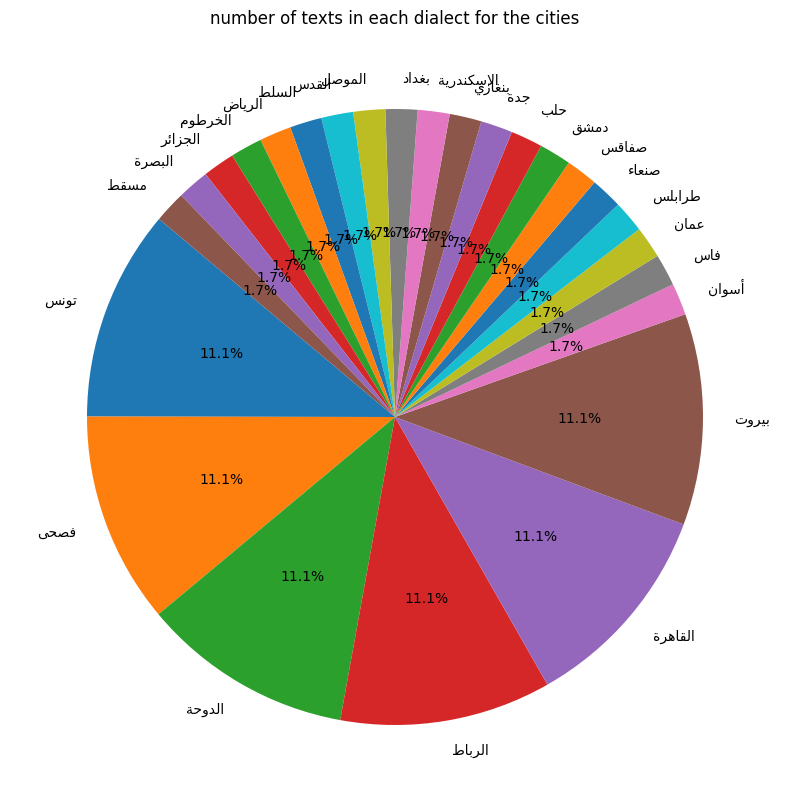

In [ ]:
city_counts = data_trian_df.groupby('City')['sent'].count()
city_counts = city_counts.sort_values(ascending=False)
reshaped_labels= [get_display(arabic_reshaper.reshape(city)) for city in city_counts.index]
plt.figure(figsize=(10, 10))
plt.pie(city_counts, labels=reshaped_labels, autopct='%1.1f%%', startangle=140)
plt.title("number of texts in each dialect for the cities")
plt.show()

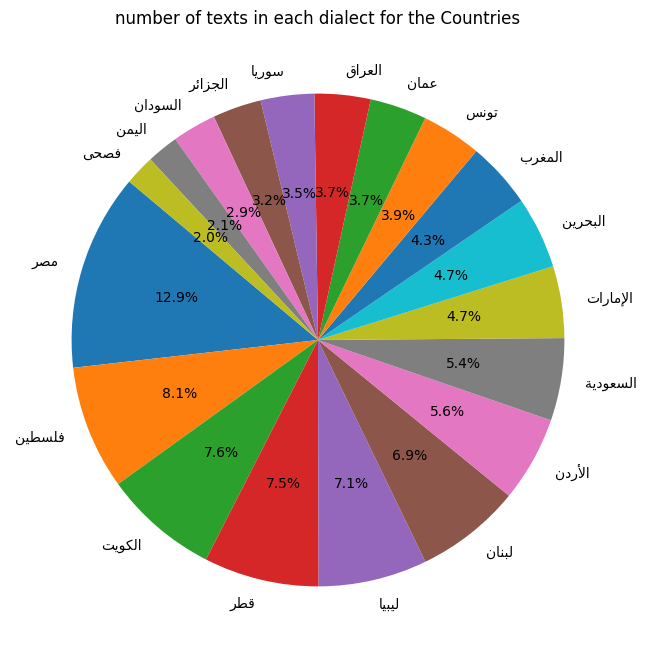

In [ ]:
country_counts = data_trian_df.groupby('Country')['sent'].count()
country_counts = country_counts.sort_values(ascending=False)
reshaped_labels= [get_display(arabic_reshaper.reshape(country)) for country in country_counts.index]
plt.figure(figsize=(8, 8))
plt.pie(country_counts, labels=reshaped_labels, autopct='%1.1f%%', startangle=140)
plt.title("number of texts in each dialect for the Countries")
plt.show()

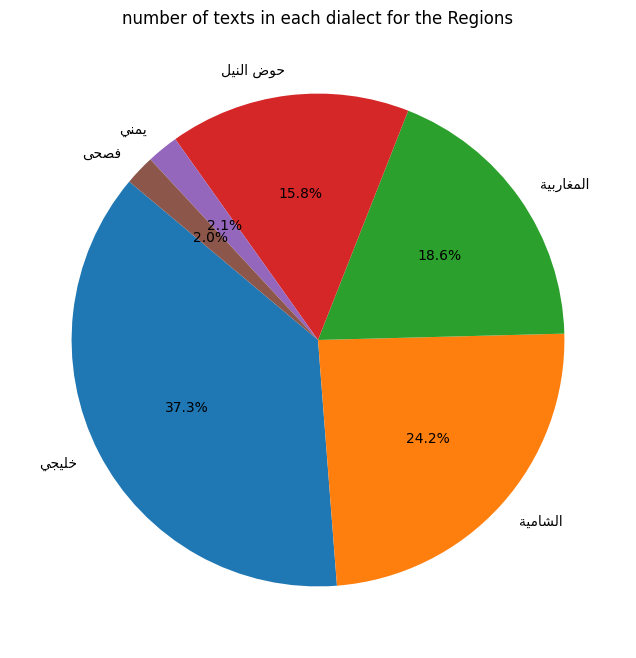

In [ ]:
region_counts = data_trian_df.groupby('Region')['sent'].count()
region_counts = region_counts.sort_values(ascending=False)
reshaped_labels= [get_display(arabic_reshaper.reshape(region)) for region in region_counts.index]
plt.figure(figsize=(8, 8))
plt.pie(region_counts, labels=reshaped_labels, autopct='%1.1f%%', startangle=140)
plt.title("number of texts in each dialect for the Regions")
plt.show()

<div dir="rtl">
ملاحظات :<br>
حسب المناطق (regions):<br>
- المنطقة الخليجية (glof) تحتوي اكبر نسبة من النصوص في مجموعة البيانات 34.3% .<br>
-هناك نقص بالبيانات التي تمثل منطقة اليمني (yemen) في الداتا .<br>
-المنطقة المغربيّة ومنطقة حوض النيل لديها نسب متقاربة بعدد النصوص ضمن الداتا .<br>
حسب البلاد (countries):<br>
- بلد ليبيا هي الاكثر مساهمة بعدد النصوص ضمن المنطقة المغاربيية ،اما في منطقة حوض النيل فعد النصوص من بلد مصر هي الاكثر ،وفي المنطقة الشاميية تعد النصوص من اللبنان وفلسطين الاكثر عددا ،واخيرا في المنطقة الخليجية العدد الاكبر من النصوص يوجد في بلد الكويت وقطر .<br>
- بلد الجزائر وعمان يملكان عددا صغيرا من النصوص على الرغم من انتماءهم الى منطقتين بعدد نصوص كبير نسبيا .<br>
حسب المدن (cities) <br>
-النصوص ليست موزعة بالتساوي بين المدن حيث يوجد ٥ دول فقط بعدد نصوص اكبر اما بقية المدن فعدد النصوص فيها صغير .<br>
مما سبق وجدنا ان البيانات تظهر تركيزا في عدد قليل من المدن مما يشير الى توزع غير متساو .<br>
الاحظ ايضا ان البيانات في داتا مدار غير متوازنة فقد ظهر ذلك في تمثل عدد النصوص لكل مدينة بينما كان هناك توازن نوعا ما عند تمثيل عدد النصوص على  مستوى البلاد او المناطق حيث ان داتا كادي متوازنة نوعا ما لذلك عند اضافتها مع مدار قل عدم توازن البيانات بشكل ملحوظ  <br>
</div>

## [2.2]

In [ ]:
def tokenize(text):
    tokens = wordpunct_tokenize(text)
    # arabic_tokens = [token for token in tokens if regex.match(r"^\p{IsArabic}+$", token)]
    return tokens

data_trian_df['tokens'] = data_trian_df['sent'].apply(tokenize)

all_tokens = [token for tokens_list in data_trian_df['tokens'] for token in tokens_list]
total_tokens = len(all_tokens)
unique_tokens = len(set(all_tokens))

print(f"عدد الكلمات الكلي (Total Tokens): {total_tokens}")
print(f"عدد الكلمات الفريدة (Vocab Tokens): {unique_tokens}")


عدد الكلمات الكلي (Total Tokens): 8466370
عدد الكلمات الفريدة (Vocab Tokens): 739865


In [ ]:
data_trian_df.head()

,split,sent,Region,Country,City,tokens
3,corpus-6-test-corpus-26-train,راه تما، مقابل مكتب استعلامات السياح بالضبط.,المغاربية,المغرب,الرباط,"[راه, تما, ،, مقابل, مكتب, استعلامات, السياح, ..."
4,corpus-6-test-corpus-26-train,ما عمري سمعت هاد العنوان هنايا.,المغاربية,المغرب,الرباط,"[ما, عمري, سمعت, هاد, العنوان, هنايا, .]"
5,corpus-6-test-corpus-26-train,سير نيشان حتا تشوف صيدلية.,المغاربية,المغرب,الرباط,"[سير, نيشان, حتا, تشوف, صيدلية, .]"
14,corpus-6-test-corpus-26-train,شحال كا يدير الفطور؟,المغاربية,المغرب,الرباط,"[شحال, كا, يدير, الفطور, ؟]"
15,corpus-6-test-corpus-26-train,كيفاش نقدر نعاونك؟,المغاربية,المغرب,الرباط,"[كيفاش, نقدر, نعاونك, ؟]"


## [2.3]

In [ ]:
# عظ

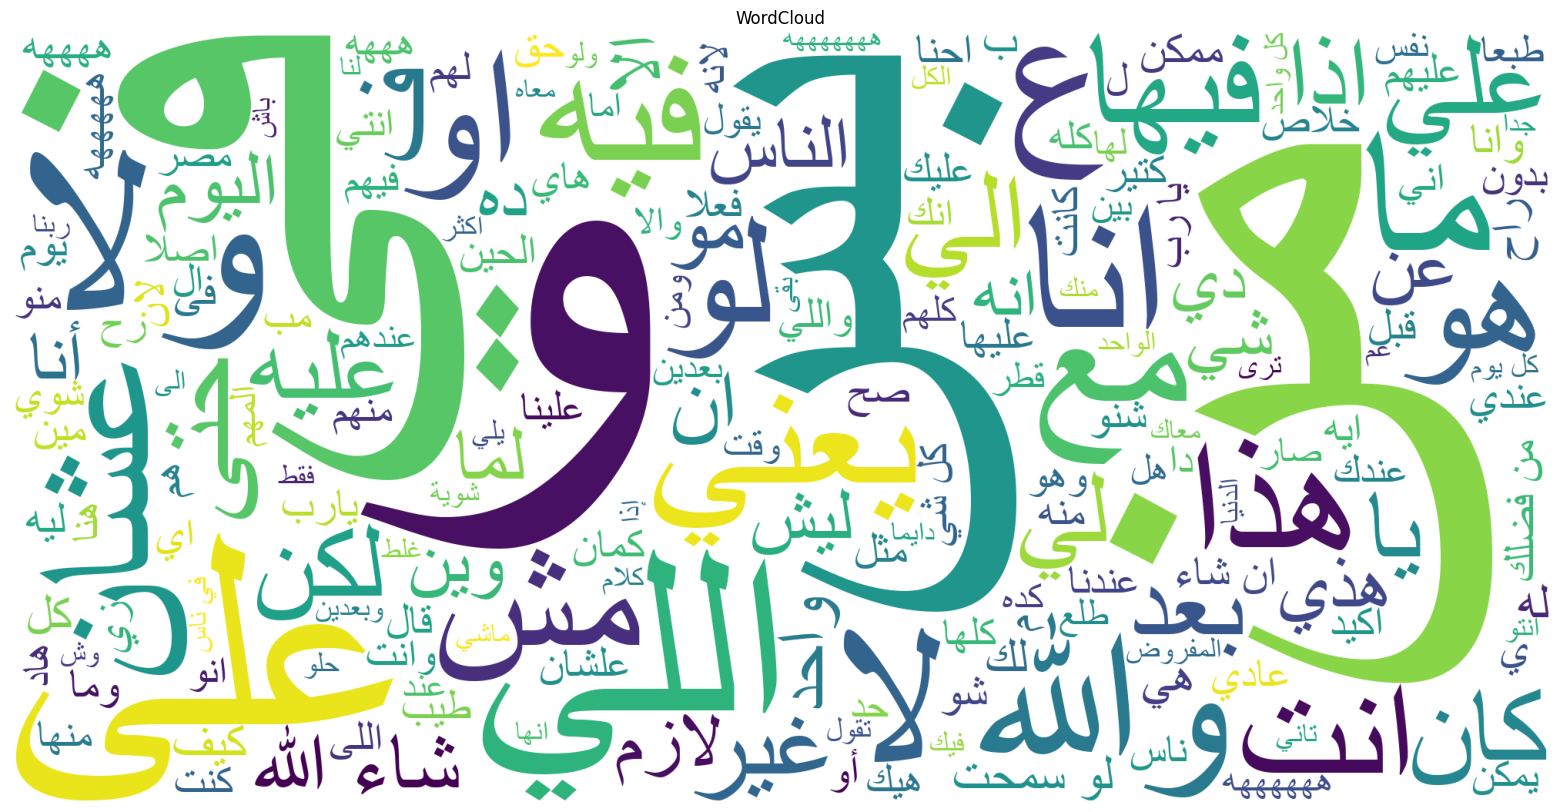

In [ ]:
data = ' '.join(all_tokens)

reshaped_text = arabic_reshaper.reshape(data)

processed_data = get_display(reshaped_text)

wordcloud = WordCloud(
    font_path='arial',
    background_color='white',
    mode='RGB',
    width=2000,
    height=1000
).generate(processed_data)

plt.figure(figsize=(20, 10))
plt.title("WordCloud")
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


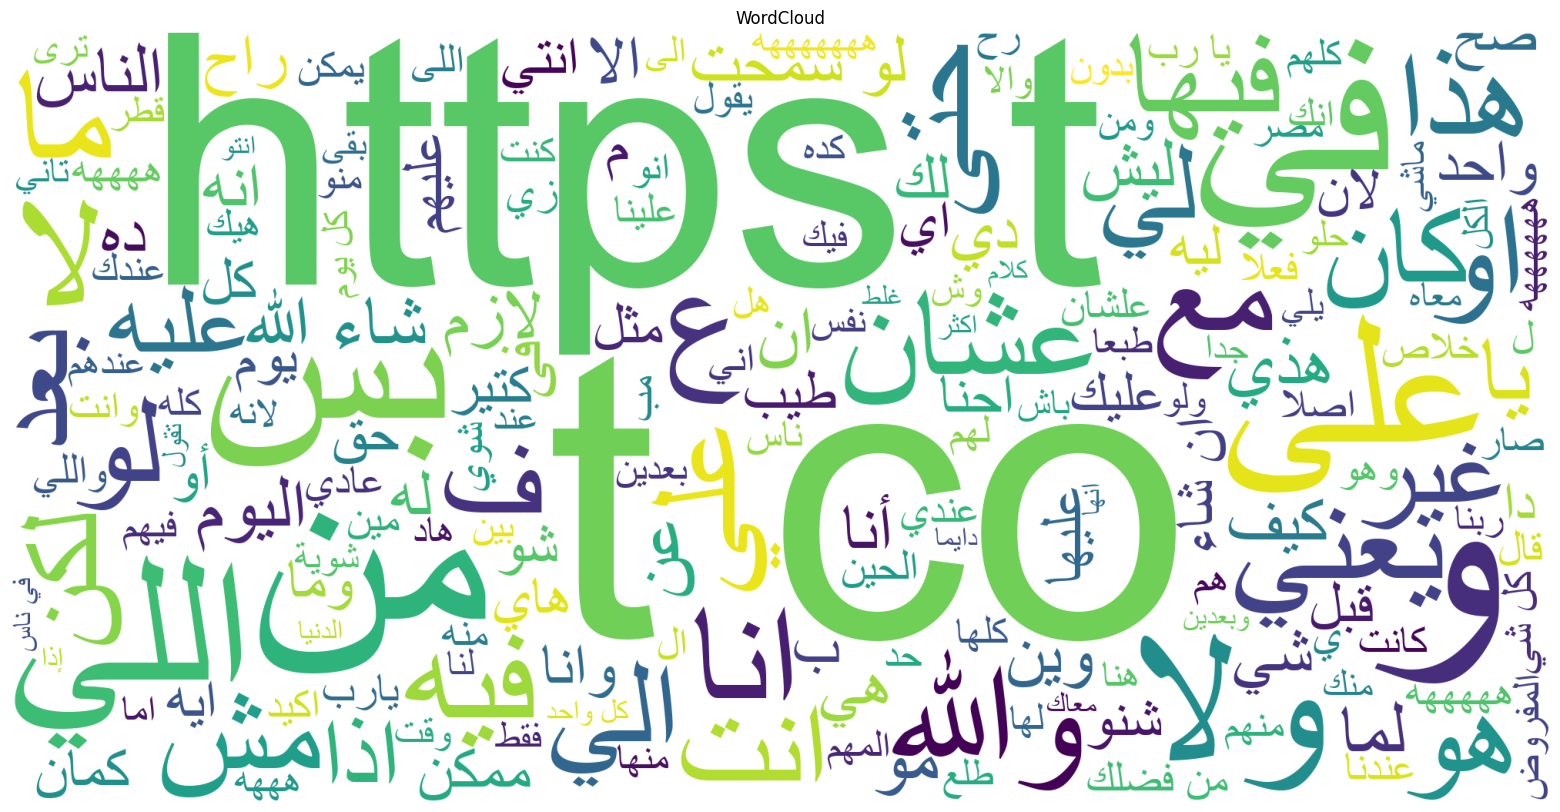

In [ ]:
arabic_tokens = []
other_tokens = []
def is_arabic(text):
    return regex.match(r"^\p{IsArabic}+$", text) is not None
for token in all_tokens:
    if is_arabic(token):
        arabic_tokens.append(token)
    else:
        other_tokens.append(token)

arabic_text = ' '.join(arabic_tokens)
reshaped_text = arabic_reshaper.reshape(arabic_text)
processed_arabic_text = get_display(reshaped_text)

final_text = processed_arabic_text + ' ' + ' '.join(other_tokens)

wordcloud = WordCloud(
    font_path='arial',
    background_color='white',
    mode='RGB',
    width=2000,
    height=1000
).generate(final_text)

plt.figure(figsize=(20, 10))
plt.title("WordCloud")
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:

# plt.figure(figsize=(20, 10))
# plt.title("WordCloud")
# plt.imshow(wordcloud)
# plt.axis("off")
# wordcloud_path = "wordcloud_output1.png"  # اسم ملف الصورة
# plt.savefig(wordcloud_path, dpi=300, bbox_inches='tight')  # الحفظ بجودة عالية
# plt.show()
# print(f"تم حفظ الصورة في: {wordcloud_path}")


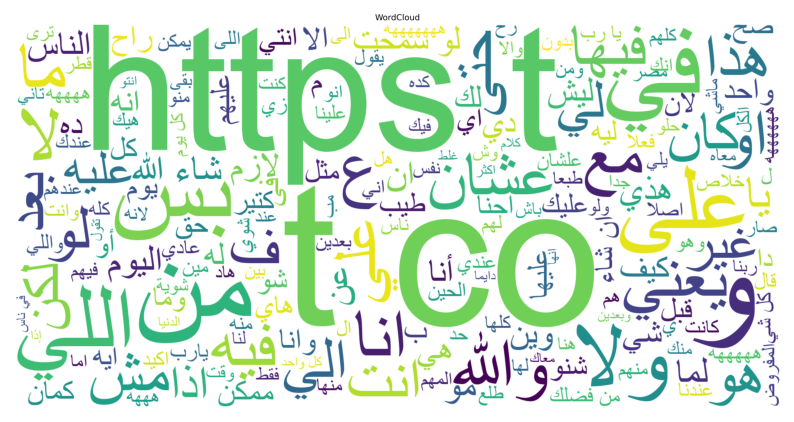

In [ ]:
img = plt.imread("wordcloud_output1.png")
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis("off")  # إزالة المحاور
plt.show()

## [2.4]

In [ ]:
def get_most_common_words(tokens, n=10):
    """Return the n most common words."""
    word_freq = FreqDist(tokens)
    return word_freq.most_common(n)

def get_hapaxes(tokens, n=10):
    """Return the first n hapaxes (words that appear only once)."""
    word_freq = FreqDist(tokens)
    hapaxes = [word for word in word_freq.hapaxes()]
    return hapaxes[:n]

def get_most_common_bigrams(tokens, n=10):
    """Return the n most common bigrams."""
    bigram_freq = FreqDist(bigrams(tokens))
    return bigram_freq.most_common(n)

def get_most_common_trigrams(tokens, n=10):
    """Return the n most common trigrams."""
    trigram_freq = FreqDist(trigrams(tokens))
    return trigram_freq.most_common(n)

def get_most_important_bigrams(tokens, n=10):
    """Return the n most important bigrams using PMI."""
    bigram_finder = BigramCollocationFinder.from_words(tokens)
    bigram_finder.apply_freq_filter(2)
    return bigram_finder.nbest(BigramAssocMeasures().pmi, n)

def get_most_important_trigrams(tokens, n=10):
    """Return the n most important trigrams using PMI."""
    trigram_finder = TrigramCollocationFinder.from_words(tokens)
    trigram_finder.apply_freq_filter(2)
    return trigram_finder.nbest(TrigramAssocMeasures().pmi, n)


In [ ]:
def analyze_texts(dataframe, column='City', n=10):
    """Analyze texts and print results for each city."""
    city_tokens = {}

    # تجميع جميع النصوص لكل مدينة
    for index, row in dataframe.iterrows():
        label = row[column]
        tokens = row['tokens']
        if pd.isna(label):
            continue
        if label not in city_tokens:
            city_tokens[label] = []
        city_tokens[label].extend(tokens)

    # تحليل النصوص لكل مدينة
    for city, tokens in city_tokens.items():
        most_common = get_most_common_words(tokens, n)
        hapaxes = get_hapaxes(tokens, n)
        most_common_bigrams = get_most_common_bigrams(tokens, n)
        most_common_trigrams = get_most_common_trigrams(tokens, n)
        most_important_bigrams = get_most_important_bigrams(tokens, n)
        most_important_trigrams = get_most_important_trigrams(tokens, n)

        # طباعة النتائج لكل مدينة
        print(f"=== Results for {city} ===")
        print("Most Common Words: ", ', '.join([f"{word} ({count})" for word, count in most_common]))
        print("Hapaxes: ", ', '.join(hapaxes))
        print("Most Common Bigrams: ", ', '.join([f"{' '.join(bigram)} ({count})" for bigram, count in most_common_bigrams]))
        print("Most Common Trigrams: ", ', '.join([f"{' '.join(trigram)} ({count})" for trigram, count in most_common_trigrams]))
        print("Most Important Bigrams: ", ', '.join([' '.join(bigram) for bigram in most_important_bigrams]))
        print("Most Important Trigrams: ", ', '.join([' '.join(trigram) for trigram in most_important_trigrams]))
        print("=" * 50)


In [ ]:
analyze_texts(data_trian_df)

=== Results for حلب ===
Most Common Words:  إذا (250), سمحت (207), بدي (164), ما (110), من (94), خرج (93), رح (92), في (87), هاد (85), ع (82)
Hapaxes:  معلومات, السياح, سمعان, بهالعنوان, كريمة, بقهوتك, تصرفلي, الميتين, الكافيه, اطفال
Most Common Bigrams:  إذا سمحت (206), في شي (29), ما عم (12), من هون (12), شكرا إلك (10), سمحت بدي (10), سمحت وين (9), وين بقدر (8), خرج آخد (8), في عنا (7)
Most Common Trigrams:  إذا سمحت بدي (10), إذا سمحت وين (9), إذا سمحت اش (7), إذا سمحت خرج (6), إذا سمحت عطيني (6), إذا سمحت شقد (5), إذا سمحت شلون (5), في شي محلات (5), قريب من هون (5), إذا سمحت ما (4)
Most Important Bigrams:  التصريح الجمركي, الحي الصيني, بالتوقيت المحلي, بشتغل بشركة, حديقة الحيوانات, عطلة وطنية, فنادق رخيصة, لاس فيغاس, لوس أنجلس, الضريبة وكلفة
Most Important Trigrams:  الضريبة وكلفة الخدمة, القطار لحتى أوصل, أدق مكالمة خارجية, انسرقت مني شنتايتي, ينعن ينعن ينعن, عند تالت مفرق, الطرف تبعك عالخط, ايه بي سي, الخطوط الجوية اليابانية, بطاقتين درجة تانية
=== Results for الاسكندرية ===
Most

In [ ]:
analyze_texts(data_trian_df,"Country")

=== Results for سوريا ===
Most Common Words:  من (3428), ما (2786), بس (2077), و (2055), الله (1683), على (1433), يا (1433), اللي (1367), في (1319), عم (1300)
Hapaxes:  بهالعنوان, بقهوتك, عريض, للاستعمال, المفرد, إثبات, تسخنو, مصممة, ترتيبات, أتساعد
Most Common Bigrams:  العفاريت الزرق (231), إذا سمحت (217), اعتقلوه العفاريت (189), شاء الله (177), لو سمحت (129), ان شاء (119), في شي (91), ما عم (82), كل شي (79), كل يوم (77)
Most Common Trigrams:  اعتقلوه العفاريت الزرق (183), ان شاء الله (118), العفاريت الزرق بتاريخ (70), العفاريت الزرق من (64), مواليد اعتقلوه العفاريت (53), العفاريت الزرق تبع (30), الزرق بتاريخ من (27), إن شاء الله (26), شو عم يصير (23), و ماحدا بيعرف (23)
Most Important Bigrams:  ازرعوها بدقن, الإجراءات الرسمية, الاقيها جمبي, البوكسينغ داي, التنازلي لنهاية, الحبه قبه, السندويشة الثالثة, العد التنازلي, الفردوس الاعلى, المضحك المبكي
Most Important Trigrams:  العد التنازلي لنهاية, رفقاتك مانسيوك بعدهن, سيداتي وسادتي برحلتنا, لوحات مونيت هالبيتزا, اشتروها وحطوا مصرياتها, 

In [ ]:
analyze_texts(data_trian_df,"Region")

=== Results for الشامية ===
Most Common Words:  ما (26034), من (22288), بس (15770), و (15242), يا (12747), في (12252), مش (11660), الله (11031), اللي (9860), على (9508)
Hapaxes:  المفرد, أتساعد, هبمرغر, عالعملية, وحبار, الجواني, للمانطو, إدينبيره, ودائع, هالكفوف
Most Common Bigrams:  يا رب (1260), شاء الله (1109), ما في (1003), لو سمحت (870), كل شي (723), في ناس (700), بس ما (669), ما حدا (625), ان شاء (620), إزا بتريد (562)
Most Common Trigrams:  ان شاء الله (611), ما شاء الله (251), اعتقلوه العفاريت الزرق (183), الله ونعم الوكيل (168), حسبي الله ونعم (125), إن شاء الله (124), الله يبارك فيك (117), ما في شي (99), وان شاء الله (91), بغض النظر عن (76)
Most Important Bigrams:  أقفت ركابه, اغصبوني وغطت, اقرابك ولحمك, الأحوط وجوبا, الاحتباس الحراري, الاسمراني شبكنا, التحقق بخطوتين, الحابل بالنابل, السوقية والصعاليك, الفرخه الدايخه
Most Important Trigrams:  اقرابك ولحمك ودمك, بتاريخها ومعلقه بعنوانها, بثمامها معذبه بتاريخها, مراري وطفيها بدمعي, معذبه بتاريخها ومعلقه, ونسكي ومحياي ومماتي, ﺑﺪ

## [2.5]

In [ ]:


def find_distinctive_words(dataframe, column='City', threshold=10):
    dialect_words = {}
    all_words = set()
    for index, row in dataframe.iterrows():
        dialect = row[column]
        if pd.isna(dialect):
            continue
        tokens = row['tokens']
        if dialect not in dialect_words:
            dialect_words[dialect] = Counter()
        dialect_words[dialect].update(tokens)
        all_words.update(tokens)
    distinctive_words = {
        dialect: {
            word: count
            for word, count in dialect_words[dialect].items()
            if count <= threshold and all(
                word not in dialect_words[other_dialect]
                for other_dialect in dialect_words if other_dialect != dialect
            )
        }
        for dialect in dialect_words
    }

    distinctive_words_sorted = {
        dialect: dict(sorted(words.items(), key=lambda x: x[1]))
        for dialect, words in distinctive_words.items()
    }

    for dialect, words in distinctive_words_sorted.items():
        print(f"\nالكلمات المميزة في لهجة {dialect}:")
        if words:
            print(', '.join([f"{word} ({count})" for word, count in words.items()]))
        else:
            print("لا توجد كلمات مميزة تتجاوز العتبة المحددة")

    return distinctive_words_sorted

In [ ]:
c=find_distinctive_words(data_trian_df)


الكلمات المميزة في لهجة حلب:
سمعان (1), المفرد (1), أتساعد (1), سآل (1), عيف (1), هبمرغر (1), عالعملية (1), بتختاروا (1), بكفوا (1), بالكافيه (1), للمانطو (1), عالمركز (1), إدينبيره (1), عرفان (1), هالكفوف (1), أصلون (1), بتصرفون (1), ونضيفة (1), ألأقي (1), سفرية (1), خوفان (1), بيسع (1), أطويون (1), بتحسس (1), عرفة (1), ضلينا (1), أذاك (1), الاحتياط (1), انقحطت (1), أميركي (1), انفشت (1), المفضاية (1), هدك (1), وأطلع (1), خميس (1), نضفانة (1), تشباية (1), بسخافة (1), كورنيه (1), دقلها (1), يكب (1), قرايبيننا (1), أدقلها (1), إلكون (1), كشعب (1), الالاصطدام (1), ومسؤولية (1), تتعرفوا (1), حاطينون (1), حوال (1), بتتأكد (1), لضيافتك (1), معكون (1), مسكو (1), بهدول (1), النضارات (1), بتعفلي (1), تفشكل (1), وانفشكت (1), أجرو (1), عهالبناية (1), الفرين (1), مشاريبو (1), تقدرلي (1), منطلع (1), أحطو (1), بهالطابق (1), عكندا (1), معلمة (1), تيبست (1), صورية (1), بمالية (1), موعدو (1), بإجازة (1), برضى (1), أدقرو (1), صنعية (1), لساتون (1), للتنقاية (1), ينشحن (1), ويلي (1), مدرستك (1), بدالون

In [ ]:
co=find_distinctive_words(data_trian_df,"Country")

In [ ]:
re=find_distinctive_words(data_trian_df,"Region")

## [2.6]

In [ ]:
def generate_ngrams(text, n=3):
    tokens = text.split()
    return [' '.join(tokens[i:i+n]) for i in range(len(tokens)-n+1)]
def calc_similarity (df,lable,n):

    df['ngrams'] = df['sent'].apply(lambda x: generate_ngrams(x, n))

    grouped = df.groupby(lable)['ngrams'].sum()
    grouped = grouped.apply(lambda x: ' '.join(x))

    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(grouped)

    similarity_matrix = cosine_similarity(X)

    lables = grouped.index
    similarity_df = pd.DataFrame(similarity_matrix, index=lables, columns=lables)

    plt.figure(figsize=(10, 8))

    reshaped_lables = [get_display(arabic_reshaper.reshape(lable)) for lable in lables]

    sns.heatmap(similarity_df, annot=True, fmt=".2f", cmap="coolwarm", cbar=True,
                xticklabels=reshaped_lables, yticklabels=reshaped_lables, annot_kws={"size":8})
    plt.title(f"Similarity between Dialects : ({lable})")
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.show()

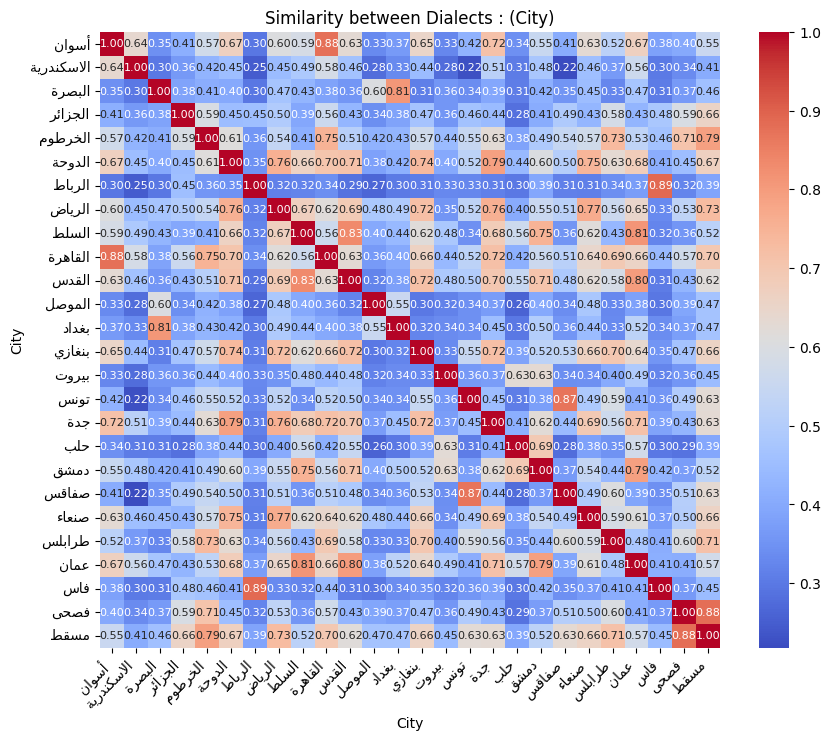

In [ ]:
calc_similarity(data_trian_df,"City",3)

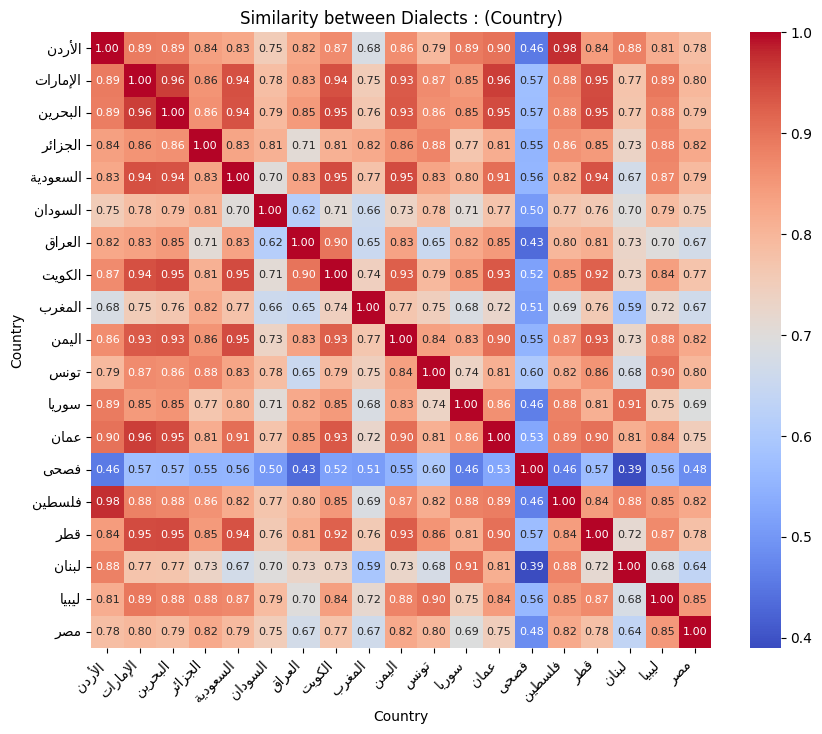

In [ ]:
calc_similarity(data_trian_df,"Country",20)

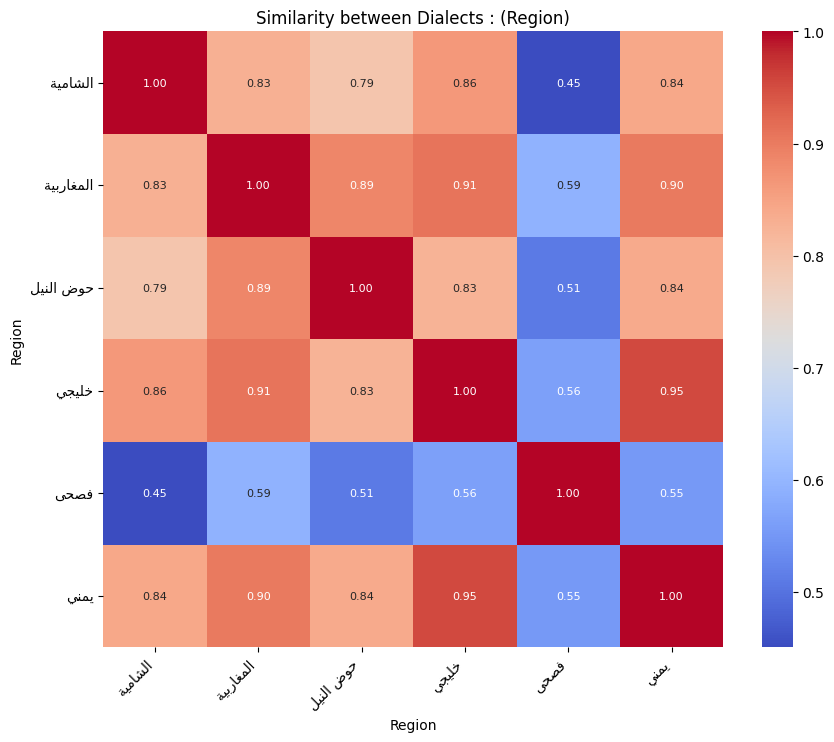

In [ ]:
calc_similarity(data_trian_df,"Region",20)

## [2.7]

In [ ]:
# !wget https://archive.org/download/arabic_corpus/vectors.txt.xz
# !xz -d vectors.txt.xz

In [ ]:
embeddings_index = {}
with open('vectors.txt', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        try:
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs
        except ValueError:pass


train_tokens = [token for tokens_list in data_trian_df['tokens'] for token in tokens_list]
unique_train_words = set(train_tokens)

oov_words = 0
for word in unique_train_words:
    if word not in embeddings_index:
        oov_words += 1
oov_rate = (oov_words / len(unique_train_words)) * 100

print(f"Number of OOV words: {oov_words}")
print(f"Total number of unique words in training data: {len(unique_train_words)}")
print(f"OOV rate: {oov_rate:.2f}%")

Number of OOV words: 474341
Total number of unique words in training data: 739865
OOV rate: 64.11%


In [ ]:
import fasttext

model_url = "https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.ar.300.bin.gz"
model_filename = "cc.ar.300.bin"

import os
if not os.path.exists(model_filename):
    print("Downloading the FastText model...")
    !wget {model_url}
    !gunzip cc.ar.300.bin.gz
    print("Model downloaded successfully.")
else:
  print("Model already exists.")


Model already exists.


In [ ]:
ft_model = fasttext.load_model(model_filename)
train_tokens = [token for tokens_list in data_trian_df['tokens'] for token in tokens_list]
unique_train_words = set(train_tokens)
model_vocab = set(ft_model.words)
oov_words = 0
for word in unique_train_words:
    if word not in  model_vocab:
        oov_words += 1

oov_rate = (oov_words / len(unique_train_words)) * 100

print(f"Number of OOV words: {oov_words}")
print(f"Total number of unique words in training data: {len(unique_train_words)}")
print(f"OOV rate: {oov_rate:.2f}%")

Number of OOV words: 466774
Total number of unique words in training data: 739865
OOV rate: 63.09%


In [ ]:
# !wget https://bakrianoo.ewr1.vultrobjects.com/aravec/full_uni_cbow_300_twitter.zip
# !unzip full_uni_cbow_300_twitter.zip

In [ ]:
model_aravec = gensim.models.Word2Vec.load("full_uni_cbow_300_twitter.mdl")

train_tokens = [token for tokens_list in data_trian_df['tokens'] for token in tokens_list]
unique_train_words = set(train_tokens)

oov_words = 0
for word in unique_train_words:
    if word not in model_aravec.wv:
        oov_words += 1

oov_rate = (oov_words / len(unique_train_words)) * 100

print(f"Number of OOV words (AraVec): {oov_words}")
print(f"Total number of unique words in training data: {len(unique_train_words)}")
print(f"OOV rate (AraVec): {oov_rate:.2f}%")

Number of OOV words (AraVec): 455129
Total number of unique words in training data: 739865
OOV rate (AraVec): 61.52%


# مهمة 03 : تنظيف وتوحيد النص

normalization and cleaning Text

## [3.1]


In [17]:
def remove_link(text):
     return re.sub(r'http\S+|www\.\S+', '', text)
def remove_hashtag(text):
     return re.sub(r'#\w+', '', text)
def remove_tag(text):
     return re.sub(r'@\w+', '', text)
def remove_foreign_word(text):
     return re.sub(r'[a-zA-z]+', '', text)
def remove_punctuation(text):
     punctuation = r'[؟،؛!…ء\"ـ\'\(\)\{\}\[\]\|\:\;\<\>\،\.\/\~\-\=\+\*\&\^\$#@\%\`]'
     return re.sub(r"(?<=\w)(" + punctuation + r")|(" + punctuation + r")(?=\w)|(" + punctuation + r")+|(" + punctuation + r")", ' ', text)
def remove_numbers(text):
     return re.sub(r'[0-9\u0660-\u0669]', '', text)
def remove_symbols(text):
     # إزالة جميع الرموز غير النصية (عدا الحروف والمسافات)
     return re.sub(r'[^\w\s\u0600-\u06FF]', '', text)
def remove_diacritics(text):
     # إزالة التشكيل من النص العربي
     return re.sub(r'[\u064B-\u065F\u0670]', '', text)
def remove_repeated_characters(text):
     return re.sub(r'(.)\1+', r'\1', text)
def remove_stop_words(text):
     stop_words = [ 'في', 'من', 'على', 'إلى', 'أن', 'عن', 'كان', 'كانت', 'هو', 'هي', 'هذا', 'هذه', 'ذلك', 'تلك', 'ما', 'ماذا' ]
     pattern = r'\b(' + '|'.join(stop_words) + r')\b'
     return re.sub(pattern, '', text)
def remove_extra_spaces(text):
     return re.sub(r'\s+', ' ', text).strip()

def apply_and_print(df, func,name,column_name):
  df[name] = df[column_name].apply(func)
  return df.head()


In [ ]:
testing_df=pd.DataFrame(data_trian_df['sent'])

In [ ]:
apply_and_print(testing_df, remove_link,"remove_link", 'sent')
apply_and_print(testing_df, remove_hashtag,"remove_hashtag", 'sent')
apply_and_print(testing_df, remove_tag,"remove_tag", 'sent')
apply_and_print(testing_df, remove_punctuation, "remove_punctuation",'sent')
apply_and_print(testing_df, remove_numbers,"remove_numbers", 'sent')
apply_and_print(testing_df, remove_symbols,"remove_symbols", 'sent')
apply_and_print(testing_df, remove_foreign_word,"remove_foreign_word", 'sent')
apply_and_print(testing_df, remove_diacritics, "remove_diacritics",'sent')
apply_and_print(testing_df, remove_repeated_characters,"remove_repeated_characters", 'sent')
apply_and_print(testing_df, remove_stop_words,"remove_stop_words", 'sent')
apply_and_print(testing_df, remove_extra_spaces,"remove_extra_spaces", 'sent')

,sent,remove_link,remove_hashtag,remove_tag,remove_punctuation,remove_numbers,remove_symbols,remove_foreign_word,remove_diacritics,remove_repeated_characters,remove_stop_words,remove_extra_spaces
3,راه تما، مقابل مكتب استعلامات السياح بالضبط.,راه تما، مقابل مكتب استعلامات السياح بالضبط.,راه تما، مقابل مكتب استعلامات السياح بالضبط.,راه تما، مقابل مكتب استعلامات السياح بالضبط.,راه تما مقابل مكتب استعلامات السياح بالضبط,راه تما، مقابل مكتب استعلامات السياح بالضبط.,راه تما، مقابل مكتب استعلامات السياح بالضبط,راه تما، مقابل مكتب استعلامات السياح بالضبط.,راه تما، مقابل مكتب استعلامات السياح بالضبط.,راه تما، مقابل مكتب استعلامات السياح بالضبط.,راه تما، مقابل مكتب استعلامات السياح بالضبط.,راه تما، مقابل مكتب استعلامات السياح بالضبط.
4,ما عمري سمعت هاد العنوان هنايا.,ما عمري سمعت هاد العنوان هنايا.,ما عمري سمعت هاد العنوان هنايا.,ما عمري سمعت هاد العنوان هنايا.,ما عمري سمعت هاد العنوان هنايا,ما عمري سمعت هاد العنوان هنايا.,ما عمري سمعت هاد العنوان هنايا,ما عمري سمعت هاد العنوان هنايا.,ما عمري سمعت هاد العنوان هنايا.,ما عمري سمعت هاد العنوان هنايا.,عمري سمعت هاد العنوان هنايا.,ما عمري سمعت هاد العنوان هنايا.
5,سير نيشان حتا تشوف صيدلية.,سير نيشان حتا تشوف صيدلية.,سير نيشان حتا تشوف صيدلية.,سير نيشان حتا تشوف صيدلية.,سير نيشان حتا تشوف صيدلية,سير نيشان حتا تشوف صيدلية.,سير نيشان حتا تشوف صيدلية,سير نيشان حتا تشوف صيدلية.,سير نيشان حتا تشوف صيدلية.,سير نيشان حتا تشوف صيدلية.,سير نيشان حتا تشوف صيدلية.,سير نيشان حتا تشوف صيدلية.
14,شحال كا يدير الفطور؟,شحال كا يدير الفطور؟,شحال كا يدير الفطور؟,شحال كا يدير الفطور؟,شحال كا يدير الفطور,شحال كا يدير الفطور؟,شحال كا يدير الفطور؟,شحال كا يدير الفطور؟,شحال كا يدير الفطور؟,شحال كا يدير الفطور؟,شحال كا يدير الفطور؟,شحال كا يدير الفطور؟
15,كيفاش نقدر نعاونك؟,كيفاش نقدر نعاونك؟,كيفاش نقدر نعاونك؟,كيفاش نقدر نعاونك؟,كيفاش نقدر نعاونك,كيفاش نقدر نعاونك؟,كيفاش نقدر نعاونك؟,كيفاش نقدر نعاونك؟,كيفاش نقدر نعاونك؟,كيفاش نقدر نعاونك؟,كيفاش نقدر نعاونك؟,كيفاش نقدر نعاونك؟


## [3.2]

In [18]:
def normaliz_and_clean(text,func_list):
    for func in func_list:
        text=func(text)
    return text

## [3.3]

In [ ]:
func_list=[remove_link,remove_hashtag,remove_tag,remove_punctuation,remove_symbols,remove_foreign_word,remove_numbers,remove_diacritics,remove_repeated_characters,remove_stop_words,remove_extra_spaces]
data_trian_df["normalize_sent"]=data_trian_df["sent"].apply(lambda x: normaliz_and_clean(x, func_list))

In [ ]:
data_trian_df.head(10)

,split,sent,Region,Country,City,tokens,normalize_sent
3,corpus-6-test-corpus-26-train,راه تما، مقابل مكتب استعلامات السياح بالضبط.,المغاربية,المغرب,الرباط,"[راه, تما, ،, مقابل, مكتب, استعلامات, السياح, ...",راه تما مقابل مكتب استعلامات السياح بالضبط
4,corpus-6-test-corpus-26-train,ما عمري سمعت هاد العنوان هنايا.,المغاربية,المغرب,الرباط,"[ما, عمري, سمعت, هاد, العنوان, هنايا, .]",عمري سمعت هاد العنوان هنايا
5,corpus-6-test-corpus-26-train,سير نيشان حتا تشوف صيدلية.,المغاربية,المغرب,الرباط,"[سير, نيشان, حتا, تشوف, صيدلية, .]",سير نيشان حتا تشوف صيدلية
14,corpus-6-test-corpus-26-train,شحال كا يدير الفطور؟,المغاربية,المغرب,الرباط,"[شحال, كا, يدير, الفطور, ؟]",شحال كا يدير الفطور
15,corpus-6-test-corpus-26-train,كيفاش نقدر نعاونك؟,المغاربية,المغرب,الرباط,"[كيفاش, نقدر, نعاونك, ؟]",كيفاش نقدر نعاونك
17,corpus-6-test-corpus-26-train,مع القنت التالت دور على ليسر.,المغاربية,المغرب,الرباط,"[مع, القنت, التالت, دور, على, ليسر, .]",مع القنت التالت دور ليسر
24,corpus-6-test-corpus-26-train,واش تبغي لاكريم و السكر في القهوة ديالك؟,المغاربية,المغرب,الرباط,"[واش, تبغي, لاكريم, و, السكر, في, القهوة, ديال...",واش تبغي لاكريم و السكر القهوة ديالك
32,corpus-6-test-corpus-26-train,تقدر تخلص الشيك ديالي ديال ميتين دولار؟,المغاربية,المغرب,الرباط,"[تقدر, تخلص, الشيك, ديالي, ديال, ميتين, دولار, ؟]",تقدر تخلص الشيك ديالي ديال ميتين دولار
36,corpus-6-test-corpus-26-train,إلا خصو يبان، عيط ليا عفاك.,المغاربية,المغرب,الرباط,"[إلا, خصو, يبان, ،, عيط, ليا, عفاك, .]",إلا خصو يبان عيط ليا عفاك
41,corpus-6-test-corpus-26-train,فين القهوة؟,المغاربية,المغرب,الرباط,"[فين, القهوة, ؟]",فين القهوة


In [ ]:
d= data_trian_df['normalize_sent'].apply(tokenize)
tokens = [token for tokens_list in d for token in tokens_list]
total_tokens_normalize = len(tokens)
unique_tokens_normalize = len(set(tokens))
print(f"nomber of total tokens  (before) : {total_tokens} , (after) : {total_tokens_normalize}")
print(f"nomber of unique tokens  (before) : {unique_tokens} , (after) : {unique_tokens_normalize}")

nomber of total tokens  (before) : 8466370 , (after) : 5908395
nomber of unique tokens  (before) : 739865 , (after) : 450276


## [3.4]

In [ ]:
short_or_empty_rows = data_trian_df[data_trian_df['normalize_sent'].str.len() < 5]
num_short_or_empty = len(short_or_empty_rows)
print(f"\nعدد الأسطر التي أصبحت فارغة أو مكونة من أقل من 5 محارف: {num_short_or_empty}")
# short_or_empty_rows
df = data_trian_df[data_trian_df['normalize_sent'].str.len() >= 5]
print(f"\nتم حذف {num_short_or_empty} أسطر.")



عدد الأسطر التي أصبحت فارغة أو مكونة من أقل من 5 محارف: 1459

تم حذف 1459 أسطر.


# مهمة 04  : بناء النموذج المرجعي

Model Baseline

In [19]:
comparison_table = {}

comparison_table['question_step_number'] = []
comparison_table['model_name'] = []
comparison_table['features'] = []
comparison_table['model_parameters'] = []
comparison_table['preprocessing_methods'] = []
comparison_table['accuracy'] = []
comparison_table['balance_accuracy'] = []

In [20]:
final_table = {}

final_table['question_step_number'] = []
final_table['model_name'] = []
final_table['features'] = []
final_table['model_parameters'] = []
final_table['preprocessing_methods'] = []
final_table['accuracy'] = []
final_table['balance_accuracy'] = []

## [4.1]


In [21]:
X_trian=data_trian_df["sent"].to_list()
Y_trian=data_trian_df["Country"].to_list()
X_test=data_test_df["sent"].to_list()
Y_test=data_test_df["Country"].to_list()
X_valid=data_vaild_df["sent"].to_list()
Y_valid=data_vaild_df["Country"].to_list()

## [4.2]

In [22]:
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_trian)
# X_valid_tfidf = vectorizer.transform(X_valid)
X_test_tfidf = vectorizer.transform(X_test)

clf = MultinomialNB()
clf.fit(X_train_tfidf, Y_trian)


MultinomialNB()

## [4.3]

In [23]:
def test_naive_bayes ( X_test_tfidf, Y_test):

    Y_pred = clf.predict(X_test_tfidf)

    accuracy = accuracy_score(Y_test, Y_pred)
    f_score = f1_score(Y_test, Y_pred, average='weighted')
    report = classification_report(Y_test, Y_pred)
    print(f"Accuracy: {accuracy}")
    print(f"f_score: {f_score}")
    return accuracy,f_score,report

def add_to_comparison_table(question_step_number,model_name,features,model_parameters,preprocessing_methods,accuracy,balance_accuracy):
  comparison_table['question_step_number'].append(question_step_number)
  comparison_table['model_name'].append(model_name)
  comparison_table['features'].append(features)
  comparison_table['model_parameters'].append(model_parameters)
  comparison_table['preprocessing_methods'].append(preprocessing_methods)
  comparison_table['accuracy'].append(accuracy)
  comparison_table['balance_accuracy'].append(balanced_accuracy)


In [24]:
accuracy,balanced_accuracy,report=test_naive_bayes (X_test_tfidf,Y_test)


Accuracy: 0.47986742824906564
f_score: 0.4444424386607807


In [25]:
add_to_comparison_table("4.3",'MultinomialNB','TF-IDF','default',"None",accuracy,balanced_accuracy)

## [4.4]

In [26]:
func_list=[remove_link]
X_trian=data_trian_df["sent"].apply(lambda x: normaliz_and_clean(x, func_list))
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_trian)
X_test_tfidf = vectorizer.transform(X_test)

clf = MultinomialNB()
clf.fit(X_train_tfidf, Y_trian)
accuracy,balanced_accuracy,report=test_naive_bayes (X_test_tfidf,Y_test)
add_to_comparison_table("4.4",'MultinomialNB','TF-IDF','default',"remove links",accuracy,balanced_accuracy)


Accuracy: 0.484451026020732
f_score: 0.4496916318990112


In [27]:
func_list=[remove_hashtag]
X_trian=data_trian_df["sent"].apply(lambda x: normaliz_and_clean(x, func_list))
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_trian)
X_test_tfidf = vectorizer.transform(X_test)

clf = MultinomialNB()
clf.fit(X_train_tfidf, Y_trian)
accuracy,balanced_accuracy,report=test_naive_bayes (X_test_tfidf,Y_test)
add_to_comparison_table("4.4",'MultinomialNB','TF-IDF','default',"remove hashtag",accuracy,balanced_accuracy)

Accuracy: 0.47690571891968125
f_score: 0.44103133269729794


In [28]:
func_list=[remove_tag]
X_trian=data_trian_df["sent"].apply(lambda x: normaliz_and_clean(x, func_list))
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_trian)
X_test_tfidf = vectorizer.transform(X_test)

clf = MultinomialNB()
clf.fit(X_train_tfidf, Y_trian)
accuracy,balanced_accuracy,report=test_naive_bayes (X_test_tfidf,Y_test)
add_to_comparison_table("4.4",'MultinomialNB','TF-IDF','default',"remove tag",accuracy,balanced_accuracy)

Accuracy: 0.4176715323319935
f_score: 0.3677214408392125


In [29]:
func_list=[remove_punctuation]
X_trian=data_trian_df["sent"].apply(lambda x: normaliz_and_clean(x, func_list))
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_trian)
X_test_tfidf = vectorizer.transform(X_test)

clf = MultinomialNB()
clf.fit(X_train_tfidf, Y_trian)
accuracy,balanced_accuracy,report=test_naive_bayes (X_test_tfidf,Y_test)
add_to_comparison_table("4.4",'MultinomialNB','TF-IDF','default',"remove punctuation",accuracy,balanced_accuracy)

Accuracy: 0.47634158380932234
f_score: 0.440303496031949


In [30]:
func_list=[remove_symbols]
X_trian=data_trian_df["sent"].apply(lambda x: normaliz_and_clean(x, func_list))
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_trian)
X_test_tfidf = vectorizer.transform(X_test)

clf = MultinomialNB()
clf.fit(X_train_tfidf, Y_trian)
accuracy,balanced_accuracy,report=test_naive_bayes (X_test_tfidf,Y_test)
add_to_comparison_table("4.4",'MultinomialNB','TF-IDF','default',"remove symbols",accuracy,balanced_accuracy)

Accuracy: 0.4801494958042451
f_score: 0.4449155516651825


In [31]:
func_list=[remove_repeated_characters]
X_trian=data_trian_df["sent"].apply(lambda x: normaliz_and_clean(x, func_list))
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_trian)
X_test_tfidf = vectorizer.transform(X_test)

clf = MultinomialNB()
clf.fit(X_train_tfidf, Y_trian)
accuracy,balanced_accuracy,report=test_naive_bayes (X_test_tfidf,Y_test)
add_to_comparison_table("4.4",'MultinomialNB','TF-IDF','default',"remove repeated_characters",accuracy,balanced_accuracy)

Accuracy: 0.45151963895352937
f_score: 0.4120061024569299


In [32]:
func_list=[remove_numbers]
X_trian=data_trian_df["sent"].apply(lambda x: normaliz_and_clean(x, func_list))
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_trian)
X_test_tfidf = vectorizer.transform(X_test)

clf = MultinomialNB()
clf.fit(X_train_tfidf, Y_trian)
accuracy,balanced_accuracy,report=test_naive_bayes (X_test_tfidf,Y_test)
add_to_comparison_table("4.4",'MultinomialNB','TF-IDF','default',"remove numbers",accuracy,balanced_accuracy)

Accuracy: 0.4525068753966575
f_score: 0.41164913991608626


In [33]:
func_list=[remove_extra_spaces]
X_trian=data_trian_df["sent"].apply(lambda x: normaliz_and_clean(x, func_list))
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_trian)
X_test_tfidf = vectorizer.transform(X_test)

clf = MultinomialNB()
clf.fit(X_train_tfidf, Y_trian)
accuracy,balanced_accuracy,report=test_naive_bayes (X_test_tfidf,Y_test)
add_to_comparison_table("4.4",'MultinomialNB','TF-IDF','default',"remove extra spaces",accuracy,balanced_accuracy)

Accuracy: 0.47986742824906564
f_score: 0.4444424386607807


In [34]:
func_list=[remove_foreign_word]
X_trian=data_trian_df["sent"].apply(lambda x: normaliz_and_clean(x, func_list))
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_trian)
X_test_tfidf = vectorizer.transform(X_test)

clf = MultinomialNB()
clf.fit(X_train_tfidf, Y_trian)
accuracy,balanced_accuracy,report=test_naive_bayes (X_test_tfidf,Y_test)
add_to_comparison_table("4.4",'MultinomialNB','TF-IDF','default',"remove foreign word",accuracy,balanced_accuracy)

Accuracy: 0.4164727452224808
f_score: 0.36601758689192043


In [35]:
func_list=[remove_stop_words]
X_trian=data_trian_df["sent"].apply(lambda x: normaliz_and_clean(x, func_list))
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_trian)
X_test_tfidf = vectorizer.transform(X_test)

clf = MultinomialNB()
clf.fit(X_train_tfidf, Y_trian)
accuracy,balanced_accuracy,report=test_naive_bayes (X_test_tfidf,Y_test)
add_to_comparison_table("4.4",'MultinomialNB','TF-IDF','default',"remove stop words",accuracy,balanced_accuracy)

Accuracy: 0.48184190113532194
f_score: 0.44746157173022016


In [36]:
func_list=[remove_diacritics]
X_trian=data_trian_df["sent"].apply(lambda x: normaliz_and_clean(x, func_list))
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_trian)
X_test_tfidf = vectorizer.transform(X_test)

clf = MultinomialNB()
clf.fit(X_train_tfidf, Y_trian)
accuracy,balanced_accuracy,report=test_naive_bayes (X_test_tfidf,Y_test)
add_to_comparison_table("4.4",'MultinomialNB','TF-IDF','default',"remove diacritics",accuracy,balanced_accuracy)

Accuracy: 0.47993794513786053
f_score: 0.44503317906180245


## [4.5]

In [37]:
func_list=[remove_link,remove_symbols,remove_stop_words,remove_diacritics,remove_extra_spaces]
X_trian=data_trian_df["sent"].apply(lambda x: normaliz_and_clean(x, func_list))
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_trian)
X_test_tfidf = vectorizer.transform(X_test)

In [38]:
clf = MultinomialNB()
clf.fit(X_train_tfidf, Y_trian)
accuracy,balanced_accuracy,report=test_naive_bayes (X_test_tfidf,Y_test)
add_to_comparison_table("4.5",'MultinomialNB','TF-IDF','default',"remove_link,remove_symbols,remove_stop_words,remove_diacritics,remove_extra_spaces",accuracy,balanced_accuracy)

Accuracy: 0.4867075664621677
f_score: 0.4525644680271463


## [4.6]

In [39]:
func_list=[remove_link,remove_symbols,remove_stop_words,remove_diacritics,remove_extra_spaces]
X_trian=data_trian_df["sent"].apply(lambda x: normaliz_and_clean(x, func_list))

In [40]:
vectorizer = TfidfVectorizer(max_df=0.8)
X_train_tfidf = vectorizer.fit_transform(X_trian)
X_valid_tfidf = vectorizer.transform(X_valid)
clf = MultinomialNB()
clf.fit(X_train_tfidf, Y_trian)
accuracy,balanced_accuracy,report=test_naive_bayes (X_valid_tfidf,Y_valid)
add_to_comparison_table("4.6",'MultinomialNB','TF-IDF','max_df=0.8',"remove_link,remove_symbols,remove_stop_words,remove_diacritics,remove_extra_spaces",accuracy,balanced_accuracy)

Accuracy: 0.5625122765664898
f_score: 0.5357980141462194


In [41]:
vectorizer = TfidfVectorizer(max_df=0.6)
X_train_tfidf = vectorizer.fit_transform(X_trian)
X_valid_tfidf = vectorizer.transform(X_valid)
clf = MultinomialNB()
clf.fit(X_train_tfidf, Y_trian)
accuracy,balanced_accuracy,report=test_naive_bayes (X_valid_tfidf,Y_valid)
add_to_comparison_table("4.6",'MultinomialNB','TF-IDF','max_df=0.6',"remove_link,remove_symbols,remove_stop_words,remove_diacritics,remove_extra_spaces",accuracy,balanced_accuracy)

Accuracy: 0.5625122765664898
f_score: 0.5357980141462194


In [42]:
vectorizer = TfidfVectorizer(min_df=0.06)
X_train_tfidf = vectorizer.fit_transform(X_trian)
X_valid_tfidf = vectorizer.transform(X_valid)
clf = MultinomialNB()
clf.fit(X_train_tfidf, Y_trian)
accuracy,balanced_accuracy,report=test_naive_bayes (X_valid_tfidf,Y_valid)
add_to_comparison_table("4.6",'MultinomialNB','TF-IDF',',min_df=0.06',"remove_link,remove_symbols,remove_stop_words,remove_diacritics,remove_extra_spaces",accuracy,balanced_accuracy)

Accuracy: 0.13789039481437831
f_score: 0.04039696179529227


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [43]:
vectorizer = TfidfVectorizer(min_df=0.01)
X_train_tfidf = vectorizer.fit_transform(X_trian)
X_valid_tfidf = vectorizer.transform(X_valid)
clf = MultinomialNB()
clf.fit(X_train_tfidf, Y_trian)
accuracy,balanced_accuracy,report=test_naive_bayes (X_valid_tfidf,Y_valid)
add_to_comparison_table("4.6",'MultinomialNB','TF-IDF','min_df=0.01',"remove_link,remove_symbols,remove_stop_words,remove_diacritics,remove_extra_spaces",accuracy,balanced_accuracy)

Accuracy: 0.20570614810449814
f_score: 0.14717005434902966


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [44]:
vectorizer = TfidfVectorizer(ngram_range=(1,2))
X_train_tfidf = vectorizer.fit_transform(X_trian)
X_valid_tfidf = vectorizer.transform(X_valid)
clf = MultinomialNB()
clf.fit(X_train_tfidf, Y_trian)
accuracy,balanced_accuracy,report=test_naive_bayes (X_valid_tfidf,Y_valid)
add_to_comparison_table("4.6",'MultinomialNB','TF-IDF','ngram_range=(1,2)',"remove_link,remove_symbols,remove_stop_words,remove_diacritics,remove_extra_spaces",accuracy,balanced_accuracy)

Accuracy: 0.5192005499901787
f_score: 0.49104869933338063


In [45]:
vectorizer = TfidfVectorizer(ngram_range=(1,3))
X_train_tfidf = vectorizer.fit_transform(X_trian)
X_valid_tfidf = vectorizer.transform(X_valid)
clf = MultinomialNB()
clf.fit(X_train_tfidf, Y_trian)
accuracy,balanced_accuracy,report=test_naive_bayes (X_valid_tfidf,Y_valid)
add_to_comparison_table("4.6",'MultinomialNB','TF-IDF','ngram_range=(1,3)',"remove_link,remove_symbols,remove_stop_words,remove_diacritics,remove_extra_spaces",accuracy,balanced_accuracy)

Accuracy: 0.5044686702023178
f_score: 0.4756672643962105


In [46]:
vectorizer = TfidfVectorizer(max_features=20000)
X_train_tfidf = vectorizer.fit_transform(X_trian)
X_valid_tfidf = vectorizer.transform(X_valid)
clf = MultinomialNB()
clf.fit(X_train_tfidf, Y_trian)
accuracy,balanced_accuracy,report=test_naive_bayes (X_valid_tfidf,Y_valid)
add_to_comparison_table("4.6",'MultinomialNB','TF-IDF','max_features=20000',"remove_link,remove_symbols,remove_stop_words,remove_diacritics,remove_extra_spaces",accuracy,balanced_accuracy)

Accuracy: 0.6049400903555293
f_score: 0.5928767010403333


In [47]:
vectorizer = TfidfVectorizer(max_features=50000)
X_train_tfidf = vectorizer.fit_transform(X_trian)
X_valid_tfidf = vectorizer.transform(X_valid)
clf = MultinomialNB()
clf.fit(X_train_tfidf, Y_trian)
accuracy,balanced_accuracy,report=test_naive_bayes (X_valid_tfidf,Y_valid)
add_to_comparison_table("4.6",'MultinomialNB','TF-IDF','max_features=50000',"remove_link,remove_symbols,remove_stop_words,remove_diacritics,remove_extra_spaces",accuracy,balanced_accuracy)

Accuracy: 0.6391671577293263
f_score: 0.6244293503234895


In [48]:
vectorizer = TfidfVectorizer(max_features=100000)
X_train_tfidf = vectorizer.fit_transform(X_trian)
X_valid_tfidf = vectorizer.transform(X_valid)
clf = MultinomialNB()
clf.fit(X_train_tfidf, Y_trian)
accuracy,balanced_accuracy,report=test_naive_bayes (X_valid_tfidf,Y_valid)
add_to_comparison_table("4.6",'MultinomialNB','TF-IDF','max_features=100000',"remove_link,remove_symbols,remove_stop_words,remove_diacritics,remove_extra_spaces",accuracy,balanced_accuracy)

Accuracy: 0.6384305637399332
f_score: 0.6210098760227106


In [50]:
vectorizer = TfidfVectorizer(ngram_range=(1,2),max_features=50000)
X_train_tfidf = vectorizer.fit_transform(X_trian)
X_valid_tfidf = vectorizer.transform(X_valid)
clf = MultinomialNB()
clf.fit(X_train_tfidf, Y_trian)
accuracy,balanced_accuracy,report=test_naive_bayes (X_valid_tfidf,Y_valid)
add_to_comparison_table("4.6",'MultinomialNB','TF-IDF','ngram_range=(1,2),max_features=50000',"remove_link,remove_symbols,remove_stop_words,remove_diacritics,remove_extra_spaces",accuracy,balanced_accuracy)

Accuracy: 0.632095855431153
f_score: 0.6179286236543984


In [51]:
vectorizer = TfidfVectorizer(max_df=0.8,max_features=50000)
X_train_tfidf = vectorizer.fit_transform(X_trian)
X_valid_tfidf = vectorizer.transform(X_valid)
clf = MultinomialNB()
clf.fit(X_train_tfidf, Y_trian)
accuracy,balanced_accuracy,report=test_naive_bayes (X_valid_tfidf,Y_valid)
add_to_comparison_table("4.6",'MultinomialNB','TF-IDF','max_df=0.8,max_features=50000',"remove_link,remove_symbols,remove_stop_words,remove_diacritics,remove_extra_spaces",accuracy,balanced_accuracy)

Accuracy: 0.6391671577293263
f_score: 0.6244293503234895


In [52]:
vectorizer = TfidfVectorizer(max_features=50000)
X_train_tfidf = vectorizer.fit_transform(X_trian)
X_valid_tfidf = vectorizer.transform(X_valid)
clf = MultinomialNB(alpha=0.05)
clf.fit(X_train_tfidf, Y_trian)
accuracy,balanced_accuracy,report=test_naive_bayes (X_valid_tfidf,Y_valid)
add_to_comparison_table("4.6",'MultinomialNB','TF-IDF','alpha=0.05,max_features=50000',"remove_link,remove_symbols,remove_stop_words,remove_diacritics,remove_extra_spaces",accuracy,balanced_accuracy)

Accuracy: 0.6483991357297191
f_score: 0.642293603923211


In [53]:
vectorizer = TfidfVectorizer(max_features=50000)
X_train_tfidf = vectorizer.fit_transform(X_trian)
X_valid_tfidf = vectorizer.transform(X_valid)
clf = MultinomialNB(alpha=0.1)
clf.fit(X_train_tfidf, Y_trian)
accuracy,balanced_accuracy,report=test_naive_bayes (X_valid_tfidf,Y_valid)
add_to_comparison_table("4.6",'MultinomialNB','TF-IDF','alpha=0.1max_features=50000',"remove_link,remove_symbols,remove_stop_words,remove_diacritics,remove_extra_spaces",accuracy,balanced_accuracy)

Accuracy: 0.652867805932037
f_score: 0.645950917513301


In [54]:
vectorizer = TfidfVectorizer(max_features=50000)
X_train_tfidf = vectorizer.fit_transform(X_trian)
X_valid_tfidf = vectorizer.transform(X_valid)
clf = MultinomialNB(alpha=0.5)
clf.fit(X_train_tfidf, Y_trian)
accuracy,balanced_accuracy,report=test_naive_bayes (X_valid_tfidf,Y_valid)
add_to_comparison_table("4.6",'MultinomialNB','TF-IDF','alpha=0.5,max_features=50000',"remove_link,remove_symbols,remove_stop_words,remove_diacritics,remove_extra_spaces",accuracy,balanced_accuracy)

Accuracy: 0.653702612453349
f_score: 0.6430181324832508


In [56]:
vectorizer = TfidfVectorizer(max_features=50000)
X_train_tfidf = vectorizer.fit_transform(X_trian)
X_valid_tfidf = vectorizer.transform(X_valid)
clf = MultinomialNB(alpha=0.8)
clf.fit(X_train_tfidf, Y_trian)
accuracy,balanced_accuracy,report=test_naive_bayes (X_valid_tfidf,Y_valid)
add_to_comparison_table("4.6",'MultinomialNB','TF-IDF','alpha=0.8,max_features=50000',"remove_link,remove_symbols,remove_stop_words,remove_diacritics,remove_extra_spaces",accuracy,balanced_accuracy)

Accuracy: 0.6454527597721469
f_score: 0.632275498492242


In [60]:
vectorizer = TfidfVectorizer(max_features=50000)
X_train_tfidf = vectorizer.fit_transform(X_trian)
X_test_tfidf = vectorizer.transform(X_test)
clf = MultinomialNB(alpha=0.5)
clf.fit(X_train_tfidf, Y_trian)
accuracy,balanced_accuracy,report=test_naive_bayes (X_test_tfidf,Y_test)

Accuracy: 0.5856427614413652
f_score: 0.5743458554616943


In [58]:
final_table['question_step_number'].append("4.6")
final_table['model_name'].append('MultinomialNB')
final_table['features'].append('TF-IDF')
final_table['model_parameters'].append('alpha=0.5,max_features=50000')
final_table['preprocessing_methods'].append("remove_link,remove_symbols,remove_stop_words,remove_diacritics,remove_extra_spaces")
final_table['accuracy'].append(accuracy)
final_table['balance_accuracy'].append(balanced_accuracy)

# مهمة 05 : التدريب باستخدام نماذج التعلم العميق

Deep learning

The Comparison Dictionary example

In [ ]:
# comparison_table = {}

# comparison_table['question_step_number'] = []
# comparison_table['model_name'] = []
# comparison_table['features'] = []
# comparison_table['model_parameters'] = []
# comparison_table['preprocessing_methods'] = []
# comparison_table['accuracy'] = []
# comparison_table['balance_accuracy'] = []

Filling the dictionary example

In [ ]:
# comparison_table['question_step_number'].append("3.5")
# comparison_table['model_name'].append('logistic_regression')
# comparison_table['features'].append('bag of words')
# comparison_table['model_parameters'].append('default')
# comparison_table['preprocessing_methods'].append("remove links")
# comparison_table['accuracy'].append(accuracy)
# comparison_table['balance_accuracy'].append(balance_accuracy_value)

NameError: name 'accuracy' is not defined

## [5.1]

In [ ]:
func_list=[remove_link,remove_symbols,remove_stop_words,remove_diacritics,remove_extra_spaces]
X_trian=data_trian_df["sent"].apply(lambda x: normaliz_and_clean(x, func_list))
Y_trian=data_trian_df["Country"].to_list()
X_test=data_test_df["sent"]
Y_test=data_test_df["Country"].to_list()
X_valid=data_vaild_df["sent"]
Y_valid=data_vaild_df["Country"].to_list()


In [ ]:
vectorizer = TfidfVectorizer(ngram_range=(1,2),max_features=500000)
X_train_tfidf = vectorizer.fit_transform(X_trian)
X_test_tfidf = vectorizer.transform(X_test)
X_valid_tfidf = vectorizer.transform(X_valid)

In [ ]:
label_encoder = LabelEncoder()
Y_trian_encoded = label_encoder.fit_transform(Y_trian)
Y_valid_encoded = label_encoder.transform(Y_valid) # استخدام نفس المشفر من أجل التناسق
Y_test_encoded = label_encoder.transform(Y_test)

In [ ]:
input_dim = X_train_tfidf.shape[1]  # يجب أن يكون input_dim هو عدد الميزات (أعمدة مصفوفة TF-IDF)
num_classes = len(set(Y_trian))

input_layer = Input(shape=(input_dim,), sparse=True)  # تعريف طبقة المدخلات

x = tf.keras.layers.Dense(128, activation='relu')(input_layer)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
output_layer = tf.keras.layers.Dense(num_classes, activation='softmax')(x)

model = tf.keras.Model(inputs=input_layer, outputs=output_layer)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # For multi-class classification
              metrics=['accuracy'])
model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 500000)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │    64,000,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 19)             │         1,235 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 64,009,619 (244.18 MB)

 Trainable params: 64,009,619 (244.18 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(X_train_tfidf, Y_trian_encoded, epochs=10, batch_size=32, validation_data=(X_valid_tfidf, Y_valid_encoded),verbose=True)

Epoch 1/10
 3050/16740 ━━━━━━━━━━━━━━━━━━━━ 2:01:47 534ms/step - accuracy: 0.2240 - loss: 2.5305

KeyboardInterrupt: 

In [ ]:
loss, accuracy = model.evaluate(X_test_tfidf, Y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")
# add_to_comparison_table("5.1", 'Deep Neural Network', 'TF-IDF', 'default', "Your preprocessing steps", accuracy, balanced_accuracy_score(Y_test, np.argmax(model.predict(X_test_tfidf), axis=1)))

## [5.2]

### [5.2.1]

### [5.2.2]

### [5.2.3]

## [5.3]

## [5.4]

## [5.5]

## [5.6]

# مهمة 06 : التمثيل الداللي

Semantic representation

## [6.1]

## [6.2]

# Final Results

In [ ]:
df = pd.DataFrame(comparison_table)
df

In [ ]:
df.to_csv("[your_name].csv", index=False)